<Figure size 432x288 with 0 Axes>

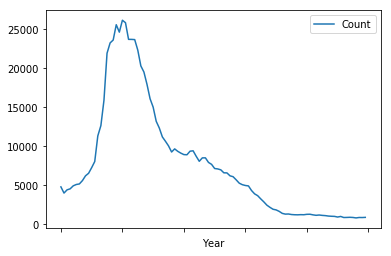

<Figure size 432x288 with 0 Axes>

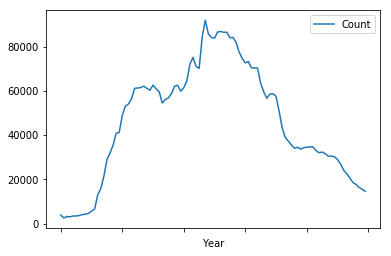

In [35]:
#1 Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
#делаем через функцию
def concat_names(target_years):
    import pandas as pd
    import matplotlib.pyplot as plt
    DATA_PATH = "D:DataS\YOB"
    names_dict_Ruth = {}
    names_dict_Robert = {}
#циклом пробегаем по нужным нам годам, загружаем данные, обрезаем только нужные нам два имени
    for target_year in range (target_years[0], target_years[1]):
        all_names = pd.read_csv(f"{DATA_PATH}\yob{target_year}.txt", names = ["Name", "Gender", "Count"])
        names_Ruth = all_names[(all_names.Name == "Ruth")]
        names_Robert = all_names[(all_names.Name == "Robert")]
#        print(names_Ruth)
#дополнительные телодвижения, чтобы учесть мужчин-Рут и женщин-Роберт
        names_Ruth = names_Ruth.groupby("Name").sum()
        names_Robert = names_Robert.groupby("Name").sum()
#        print(names_Ruth)
#подгружаем данные в словарь по ключу "Год"
        names_dict_Ruth[target_year] =  names_Ruth
        names_dict_Robert[target_year] =  names_Robert
#склеиваем данные и строим 2 графика)
    names_Ruth = pd.concat(names_dict_Ruth)
#    print(names_Ruth)
    plt.figure(); names_Ruth.plot(); plt.legend(loc='best'); plt.xlabel('Year')
    names_Robert = pd.concat(names_dict_Robert)
#    print(names_Robert)
    plt.figure(); names_Robert.plot(); plt.legend(loc='best'); plt.xlabel('Year')  
    return
concat_names([1900, 2000])





           Count
     Name       
1900 Ruth   4781
1905 Ruth   5088
1910 Ruth   7247
1915 Ruth  21924
1920 Ruth  26155
1925 Ruth  22325
1930 Ruth  15010
1935 Ruth  10041
1940 Ruth   8922
1945 Ruth   8063
1950 Ruth   7138
1955 Ruth   6200
1960 Ruth   4960
1965 Ruth   3242
1970 Ruth   1828
1975 Ruth   1235
1980 Ruth   1262
1985 Ruth   1125
1990 Ruth    913
1995 Ruth    858
2000 Ruth    903


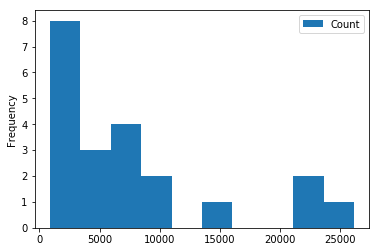

In [36]:
#2 Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
#а тут пробуем без функции, голым кодом
names_dict = {}
#циклом пробегаем по нужным нам годам, загружаем данные, обрезаем только нужные нам два имени
for year in range (1900, 2001, 5):
    all_names = pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
    names_RR = all_names[(all_names.Name == "Ruth")]
    names_RR = names_RR.groupby("Name").sum()
    names_dict[year] =  names_RR
# я не понимаю как вывести год к сожалению
names_all = pd.concat(names_dict)
print(names_all)
names_all.plot.hist(by="level_0")

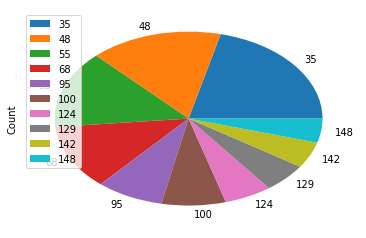

In [13]:
#3 Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
names_1950 = pd.read_csv(f"{DATA_PATH}\yob1950.txt", names = ["Name", "Gender", "Count"])
names_1950[(names_1950.Name.str.startswith("R"))].head(10).plot.pie(y="Count")
#тут криво, но вроде бы правильно

           Name    Count  Cons
0         James  4810303     3
1          John  4739978     3
2        Robert  4638964     4
3       Michael  4023311     4
4          Mary  3853769     3
5       William  3655351     4
6         David  3351325     3
7       Richard  2493119     5
8        Joseph  2289781     4
9       Charles  2189698     5
10       Thomas  2122388     4
11  Christopher  1763929     8
                  Name  Count  Cons
37042  Ryanchristopher     35    11
25209  Johnchristopher    103    11
34217  Christophermich     45    11
58241  Markchristopher      6    11
25807  Christopherjohn     97    11
50995  Christopherryan     11    11
64990  Jordanchristoph      5    11
63826  Kevinchristophe      5    10
49640      Krystallynn     12    10
50518  Christiananthon     12    10
29927      Crystallynn     66    10
56634  Christopherjose      7    10
       Name  Count  Cons
1100    Zoe  28642     1
42867  Dieu     22     1
37658  Jaie     34     1
39154   Joa     30     1
4282

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

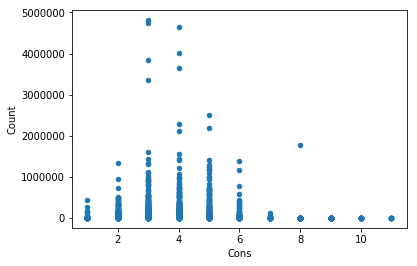

In [14]:
#4 Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".
import pandas as pd
DATA_PATH = "D:DataS\YOB"

def count_cons(row):
    return len([c for c in row.Name if c not in 'aeiou'])

names_dict = {}
#снова циклом пробегаем по всем годам, загружаем данные, обрезаем только нужные нам два имени
for year in range (1900, 2001):
    all_names = pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
    names_dict[year] =  all_names
#в прицнипе всё аналогично, просто данных намного больше, и каждый шаг приходится принтом проверять, что именно получается
names = pd.concat(names_dict)
names = names.groupby("Name").sum()
names = names.sort_values(by=["Count"], ascending=False)
names = names.reset_index()
names["Cons"] = names.apply(count_cons, axis=1)
print(names.head(12))
print(names.sort_values(by=["Cons"], ascending=False).head(12))
print(names.sort_values(by=["Cons"], ascending=True).head(12))
#а вот этим графиком я доволен. ОН не кривой и более менее информативный. Сразу видна "аномалия" - разные варианты Кристофер с его 11 согласными буквам и короткие азиатские имена, а также Зоя.
names.plot.scatter(x="Cons", y="Count")

